In [3]:
from fastai import *
from fastai.vision import *

In [5]:
import warnings
warnings. filterwarnings('ignore')

In [6]:
path = Path('/floyd/home/MH_Data/')
data = ImageDataBunch.from_folder(path,train="Train",valid ='Val',ds_tfms=get_transforms(),size=224,num_workers=4)

In [7]:
data

ImageDataBunch;

Train: LabelList (7576 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Cats,Cats,Cats,Cats,Cats
Path: /floyd/home/MH_Data;

Valid: LabelList (1895 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Cats,Cats,Cats,Cats,Cats
Path: /floyd/home/MH_Data;

Test: None

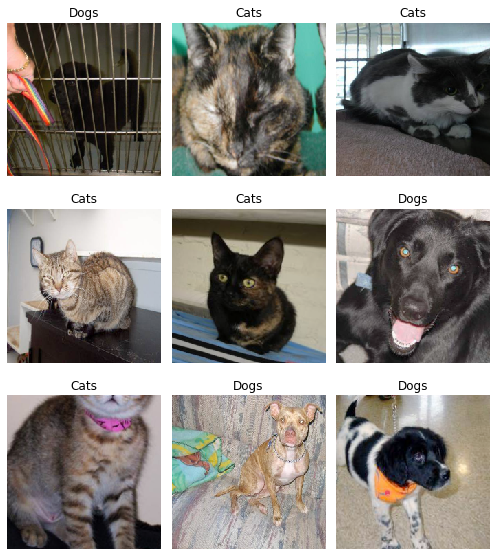

In [8]:
data.show_batch(rows=3,figsize=(7,8))

In [9]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)
learn.fit_one_cycle(5)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.151867,0.057971,0.018470,26:19
1,0.088360,0.041016,0.014776,31:08
2,0.066237,0.042826,0.013720,24:17
3,0.045264,0.032069,0.009499,24:55
4,0.036442,0.031310,0.008443,24:19


In [10]:
interp = ClassificationInterpretation.from_learner(learn)

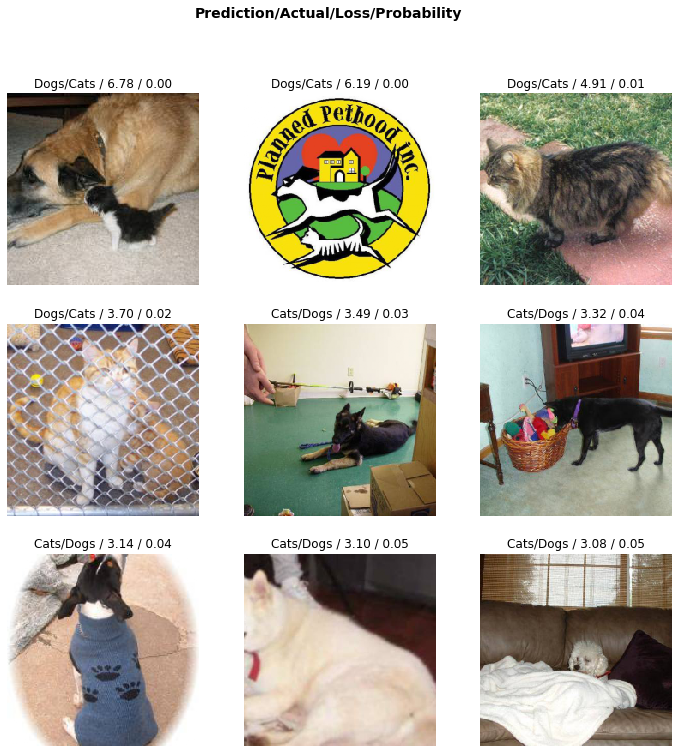

In [11]:
interp.plot_top_losses(9)

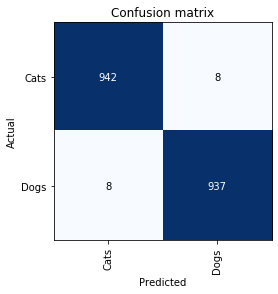

In [12]:
interp.plot_confusion_matrix()

In [13]:
preds,y,loss = learn.get_preds(with_loss=True)
#get accuracy
acc = accuracy(preds,y)
print('The accuracy is {0} %'.format(acc * 100))

The accuracy is 99.15567016601562 %


In [14]:
sub = pd.read_csv('/floyd/home/Data/Sample_Submission.csv')

In [15]:
testpath = '/floyd/home/Data/Test/'
predictions = []
for image in sub['File_Name'].values.tolist():
  img_path = testpath + image
  img = open_image(img_path)
  pred_class,pred_idx,output = learn.predict(img)
  predictions.append(output.argmax().item())


In [16]:
sub['Category'] = predictions

In [17]:
sub.head()

,File_Name,Category
0,8121.jpg,0
1,15486.jpg,0
2,8132.jpg,0
3,16297.jpg,1
4,20838.jpg,1


In [19]:
import PIL

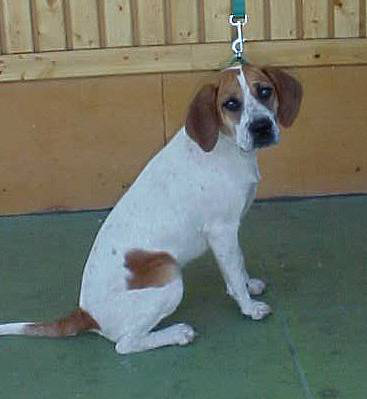

In [22]:
PIL.Image.open('/floyd/home/Data/Test/16297.jpg')

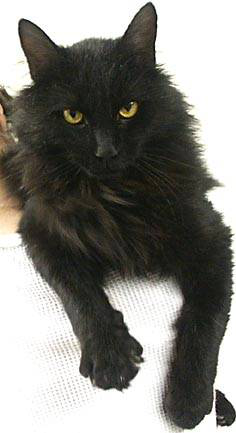

In [23]:
PIL.Image.open('/floyd/home/Data/Test/8132.jpg')

In [24]:
sub.to_csv('fastai_mh.csv',index=False)